# Computing Similarity with fitness Area

In this notebook we'll take the fitness for task for all of the alternatives and convert it into a csv (data/acw-scores-fitness_only.csv) and will calculate a modified 'euclidean distance' equation on it. This 'distance' can determine how close or far two tools are from being the same tool (score of 0) or wildly different (score of TBD).

Instructions and synopsis will be given at the botton under 'non-naive results'.

**Note:** This notebook also includes finding similarity by fitness _area_. instead of a single overall fitness score, we see which tools provided similar functionality within that fitness area (e.g. transformation, search, summary statistics, visualizations)


In [1]:
from math import *
import pandas as pd
import numpy as np
import sys

In [2]:
# The formula for Distance is defined here. This takes 2 lists and will sum the distances between the 1st, 2nd, ... nth items, pairwise, in each list.
def euclidean_distance(x,y):
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [29]:
#Read in the data


np.set_printoptions(threshold=1000)

alternatives = ['AppEEARS','Field Campaign Explorer (FCX)','OpenAltimetry','Data Access Tool','Operation IceBridge Portal','Vertex','Earthdata Search','SOOT','Airborne Data Visualizer','Giovanni','Worldview']
candidates = ['ASDC TES Subsetter','ASDC CALIPSO Subsetter','CERES Subset/Visualization Tool','ASDC MOPITT Subsetter','ACE2 Download Tool','Data Subscription and Customization Service (ECS)','Daymet Single Pixel Extraction Tool (SPET)','Model-Derived Global Aerosol Climatology for MISR Analysis ("Clim-Likely" Data Set)','MISR Browse Tool','MAPSS','DQViz','SOTO 2D','HiTIDE','Earthdata Access (508 Access tool)','Earthdata Catalog (Backed by Earthdata Access)','Spatial Data Access Tool (SDAT): Web Interface including mapwidget','Terrestrial Ecology Subsetting & Visualization Services (TESViS) Global Tool','GLIMS Glacier Viewer','MISR Customization & Order Tool','SeaBASS','ORNL DAAC Soil Moisture Visualizer (SMV)','ORNL DAAC Spatial Data Access Tool (SDAT)','SEDAC Map Viewer, POPGRID, Hazards Mapper, Pop Estimation Tool.','SEDAC map based data sub-setting and download tools.','SEDAC form based data download tools','SEDAC Map Gallery','GES DISC Data Recommender','Giovanni Mobile Application','GES DISC Subsetter','Giovanni GPT','GES DISC Publication Management System','GES DISC mEditor']
data = pd.read_csv('data/acw-scores-fitness_only.csv')
data
candidate_data = pd.read_csv('data/ccw_scores.csv')
# Dynamically generate candidate tool list
candidates = list(candidate_data.columns)[1:]
print(candidates)
areas = [
    {"name":"Discovery", "start":0, "end":4},
    {"name":"Search", "start":4, "end":22},
    {"name":"Subscriptions", "start":22, "end":23},
    {"name":"Access / Downloads", "start":23, "end":31},
    {"name":"Visualizing Search Results", "start":31, "end":35},
    {"name":"Visualize Data", "start":35, "end":60},
    {"name":"Summary Statistics", "start":60, "end":63},
    {"name":"Transformations", "start":63, "end":79},
    {"name":"Misc", "start":79, "end":95}
        ]
vectors = {}
candidate_vectors = {}
for x in alternatives:
  vectors[x] =  data[x].tolist()

print(vectors['Earthdata Search'][22:23])

for x in candidates:
  candidate_vectors[x] = candidate_data[x].tolist()


['ASDC TES Subsetter', 'ASDC CALIPSO Subsetter', 'CERES Subset/Visualization Tool', 'ASDC MOPITT Subsetter', 'Model-Derived Global Aerosol Climatology for MISR Analysis ("Clim-Likely" Data Set)', 'MISR Browse Tool', 'Earthdata Access (508 Access tool)', 'GLIMS Glacier Viewer', 'MISR Customization & Order Tool', 'GES DISC Data Recommender', 'Giovanni Mobile Application', 'GES DISC Subsetter', 'Giovanni GPT', 'GES DISC Publication Management System', 'GES DISC mEditor']
[15]


# View the Raw 'score' data for the alternatives

In [30]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
data

,Criteria,Hypothetical Tool,AppEEARS,Field Campaign Explorer (FCX),OpenAltimetry,Data Access Tool,Operation IceBridge Portal,Vertex,Earthdata Search,SOOT,Airborne Data Visualizer,Giovanni,Worldview
0,"As a user, I can access additional information...",25,25,25,25,25,25,25,25,25,25,25,25
1,Number of DAACs from which data is accessed?,25,20,5,5,5,5,5,25,5,5,25,25
2,Does the tool provide access to non-DAAC / Ext...,25,25,25,0,0,0,25,25,0,0,0,25
3,"As a user, I can search and access NASA EOSDIS...",25,25,5,10,25,25,25,25,20,10,20,20
4,"As a user, I can search data based on Geospati...",25,20,0,15,20,5,25,25,5,0,20,10
5,"As a user, I can search for data based on Temp...",25,15,0,5,5,5,25,25,25,5,0,0
6,Search data by product ID (short name),25,25,0,25,0,25,25,25,25,0,25,25
7,Search data by Campaign (e.g flight),25,0,0,0,0,0,25,25,25,25,0,0
8,Search data by Instrument,25,0,0,0,0,0,25,25,25,0,25,25
9,Search data by Mission,25,25,0,25,0,0,25,25,25,0,25,25


# Naive and Non-naive results
In this similarity, we take the diea of niave and non-naive results. In this case, naive results are looking at the 'distance' between two options as absolute. this is, essentially, the sum the squared-difference between all elements. this is the normal euclidean distance.

Non-naive results have a bit more meaning to them. This takes each tools set of capabilities and sees if other tools _do what it does_. That is, we remove any criteria the tool doesn't posess, and then compare the sum of squared-differences. We're really measuring the "overlap" of tools here. the lower the number, the more overlap in what the tools do.

In [31]:
# Setup our result array (there are 11 alternatives, so we create an 11x11 matrix)
results =  np.zeros((11, 11))
results_naive =  np.zeros((11, 11))


In [32]:
# Iterate over the whole thing to compute an overall score
for i,k in enumerate(vectors.keys()):
  for j, alternative in enumerate(alternatives):
    if k == alternative:
      score = 0
      score_naive = 0
    else:
      # ok, normally euclidean distance is the same regardless of ordering, but in the case
      # where a tool has more functionality than another tool, then we want the scores to be
      # different. So we take the tool we're examining and remove all '0's, or capabilities
      # it doesn't have, remove those from the comparison tool, and then calculate 'distance'.
      # In the case of higher overlaps, we get a smaller number. When we compute the inverse
      # relationship- the tool with many capabilities and the comparison tool without them,
      # there will be A) more comparisons and B) a larger resulting number, signifying that
      # it's harder to converge one way vs the other.

      idxlist = np.nonzero(vectors[k])[0]
      temp_vector = [vectors[k][idx] for idx in idxlist]
      temp_alternative = [vectors[alternative][idx] for idx in idxlist]
      score_naive = euclidean_distance(vectors[k], vectors[alternative])
      score = euclidean_distance(temp_vector,temp_alternative)
    results[i][j] = score
    results_naive[i][j] = score_naive



In [33]:
area_results =  np.zeros((11, 11, 9))

In [34]:
# Iterate over the each area, compute an area score for similarity
# Iterate over the whole thing to compute an overall score
for i,k in enumerate(vectors.keys()):
  for j, alternative in enumerate(alternatives):
    for area_idx, a in enumerate(areas):
        if k == alternative:
          score = 0
        else:
          idxlist = np.nonzero(vectors[k][a['start']:a['end']])[0]
          temp_vector = [vectors[k][a['start']:a['end']][idx] for idx in idxlist]
          temp_alternative = [vectors[alternative][a['start']:a['end']][idx] for idx in idxlist]
          score = euclidean_distance(temp_vector,temp_alternative)
        area_results[i][j][area_idx] = score



## Understanding the results

Each column is an alternative (C). The rows (R) in that column score how much R's functionality is covered by C. So if a tool C completely covers the functionality for R, the score will be 0. This is why the identity diagonal is always 0.

Lower scores in a column mean that there are fewer functional gaps. 


In [35]:

# print(results)
df = pd.DataFrame(results, alternatives, alternatives)
df_naive = pd.DataFrame(results_naive, alternatives, alternatives)


# Naive Results

In [36]:
df_naive

,AppEEARS,Field Campaign Explorer (FCX),OpenAltimetry,Data Access Tool,Operation IceBridge Portal,Vertex,Earthdata Search,SOOT,Airborne Data Visualizer,Giovanni,Worldview
AppEEARS,0.000000,143.854093,142.457011,141.116973,146.249786,138.434100,128.506809,127.921851,142.544730,132.434890,143.923591
Field Campaign Explorer (FCX),143.854093,0.000000,140.178458,156.364958,143.788038,150.000000,166.883193,162.941707,126.392247,146.884308,149.331845
OpenAltimetry,142.457011,140.178458,0.000000,129.228480,110.566722,156.044865,140.712473,134.721936,119.478031,147.732867,153.460093
Data Access Tool,141.116973,156.364958,129.228480,0.000000,83.216585,176.776695,152.479507,109.316056,111.915146,170.953210,164.468842
Operation IceBridge Portal,146.249786,143.788038,110.566722,83.216585,0.000000,172.843860,145.344419,121.140414,98.234414,172.481883,165.151446
Vertex,138.434100,150.000000,156.044865,176.776695,172.843860,0.000000,120.830460,156.524758,170.806909,116.726175,134.164079
Earthdata Search,128.506809,166.883193,140.712473,152.479507,145.344419,120.830460,0.000000,120.208153,154.029218,125.797456,140.712473
SOOT,127.921851,162.941707,134.721936,109.316056,121.140414,156.524758,120.208153,0.000000,135.000000,154.191439,157.003185
Airborne Data Visualizer,142.544730,126.392247,119.478031,111.915146,98.234414,170.806909,154.029218,135.000000,0.000000,173.493516,162.249807
Giovanni,132.434890,146.884308,147.732867,170.953210,172.481883,116.726175,125.797456,154.191439,173.493516,0.000000,112.361025


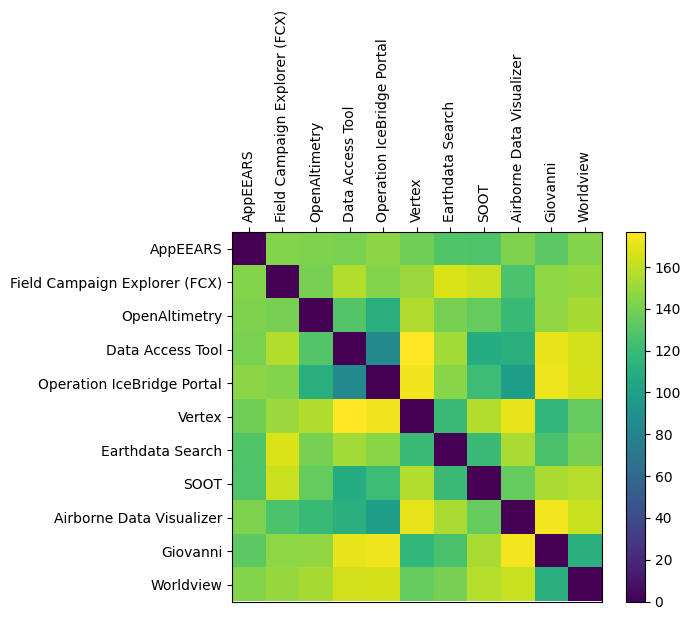

In [37]:
import matplotlib.pyplot as plt

#plt.matshow(df)
fig, ax = plt.subplots()
im = ax.imshow(df_naive)
ax.xaxis.tick_top()
plt.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(alternatives)), labels=alternatives, rotation=90)
ax.set_yticks(np.arange(len(alternatives)), labels=alternatives)
plt.show()

# Non-naive Results

In [38]:
df

,AppEEARS,Field Campaign Explorer (FCX),OpenAltimetry,Data Access Tool,Operation IceBridge Portal,Vertex,Earthdata Search,SOOT,Airborne Data Visualizer,Giovanni,Worldview
AppEEARS,0.000000,94.572723,105.328059,131.106827,129.572374,47.843495,73.749576,105.541461,122.857641,43.749286,73.749576
Field Campaign Explorer (FCX),111.242977,0.000000,112.694277,145.945195,135.462172,72.284161,112.583302,132.664992,120.312094,75.993421,91.787799
OpenAltimetry,99.874922,83.516465,0.000000,120.104121,104.761634,66.708320,83.366660,104.522725,103.682207,63.047601,81.700673
Data Access Tool,56.692151,59.581876,51.234754,0.000000,48.218254,40.620192,46.636895,44.721360,63.047601,35.707142,46.097722
Operation IceBridge Portal,72.897188,52.201533,40.926764,69.462220,0.000000,46.368092,50.497525,67.082039,60.000000,51.478151,56.568542
Vertex,131.487642,132.947358,144.308697,173.853387,169.189243,0.000000,109.201648,149.833241,165.227116,88.459030,110.227038
Earthdata Search,106.249706,126.392247,119.058809,148.323970,140.978722,56.347138,0.000000,114.891253,142.126704,66.332496,91.515026
SOOT,76.576759,95.786220,88.459030,103.440804,103.440804,50.744458,45.552168,0.000000,106.418983,55.677644,74.665923
Airborne Data Visualizer,75.993421,39.051248,59.371710,93.674970,79.214898,50.000000,67.453688,86.023253,0.000000,60.415230,63.639610
Giovanni,125.853089,128.549601,136.656504,169.041415,166.883193,79.686887,108.050914,146.628783,164.164552,0.000000,90.829511


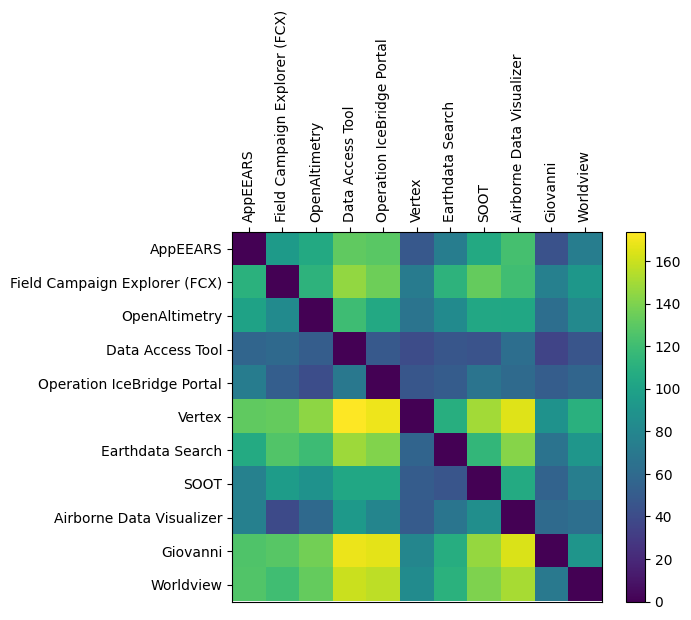

In [39]:
import matplotlib.pyplot as plt

#plt.matshow(df)
fig, ax = plt.subplots()
im = ax.imshow(df)
ax.xaxis.tick_top()
plt.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(alternatives)), labels=alternatives, rotation=90)
ax.set_yticks(np.arange(len(alternatives)), labels=alternatives)
plt.show()

# Results by fitness Area

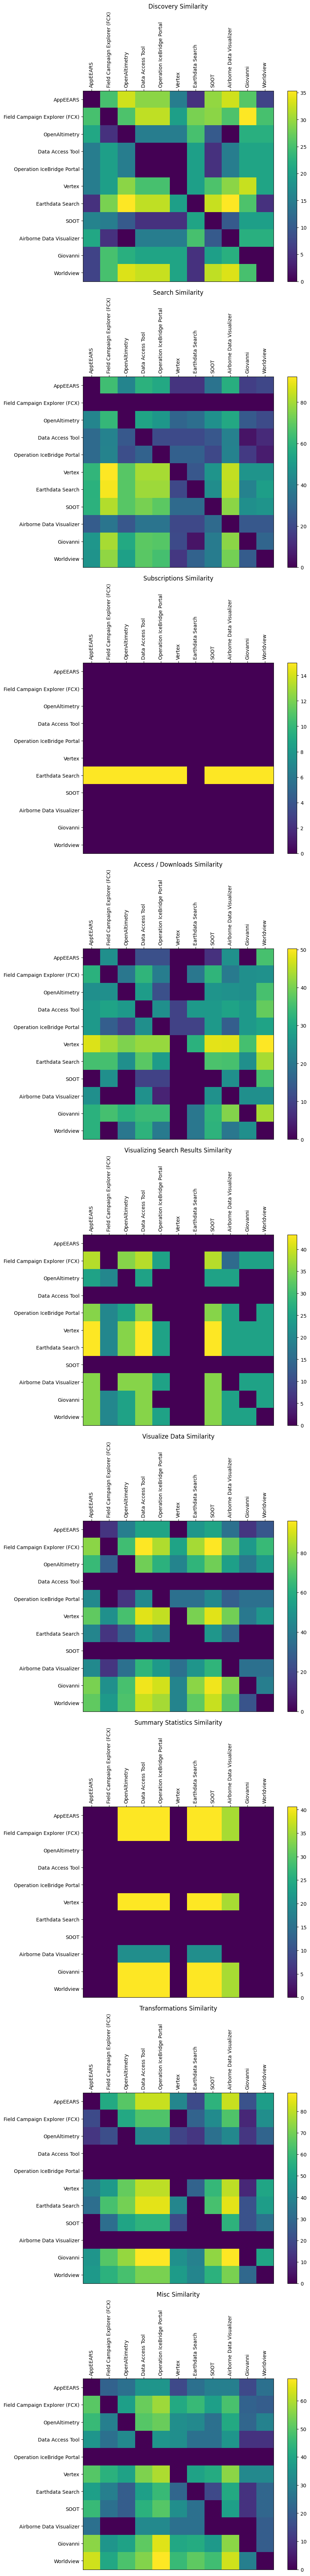

In [40]:
import matplotlib.pyplot as plt
# Here we create plots for similarity aross the fitness _area_
fig = plt.figure(figsize=(10,90))

for i, area in enumerate(areas):
    df = pd.DataFrame(area_results[:,:,i], alternatives, alternatives)
    ax = fig.add_subplot(9,1,i+1)
    plt.subplots_adjust(hspace=.5)
    im = ax.imshow(df)
    ax.title.set_text("" + area['name']+ ' Similarity')
    plt.colorbar(im, ax=ax)
    ax.xaxis.tick_top()
    ax.set_xticks(np.arange(len(alternatives)), labels=alternatives, rotation=90)
    ax.set_yticks(np.arange(len(alternatives)), labels=alternatives)




# Instructions
Looking row-wise, you're seeing how much the tool in the column header covers the row's functionality. e.g. We can see many tools in the Data Access Tool row cover those same, required functionalities. Most of them probably contain a superset of functionalities. Darker means more overlap.

Looking column-wise, we're seeing how much functionality does the column tool provide to the row-tool. Darker means more overlap.

# Takeaways

if we _only_ analyze the charts, there are a few leading takeaways we can glean. First, looking at _Rows_ the Data Access Tool, Operation IceBirdge Portal, SOOT, and Airborn Data Visualizer appear to have their functionlaities exist in most/all other tools. These would be candidates for convergence to some other tool.

Looking at Columns, Vertex, Earthdata Search, and Giovanni are the tools that do the most things that _other tools_ require. Again, this is based on the data at hand and more discussions should be had here.

## Other Takeaways
- Field Campaign Explorer would be a solid altenrative candidate for Airborn Data Visualizer.
- Vertex and Giovani show very similar scores when looking at functionalities they could provide to other existing tools, we need to discuss _how_ they provide it and if it is indeed transferable to those tools (e.g. variable basd vs collection based)



# Caveats
The similarity scores above are based solely on the fitness for task. We need to look at usage, integrations, and maturity as well.

# Warning

While this similarity in this exercise is useful, it's the start of a conversation. The numbers could be gained such that you'd have a low score (high degree of similarity) but the tools are not doing anything the same. Take a tool that only does a single criteria, and one that does another, single criteria. The scores would probably be around 25 in that case, but that doens't mean those two tools are similar at all.

With enough criteira, though, we remove that case- but there is still a manual overview required here.

# Correlation of candidate tools _to_ a suitable alternative

In [41]:
# Setup our result array (there are 11 alternatives, so we create an 11x11 matrix)
candidate_results =  np.zeros((len(candidates),11 ))


In [42]:
# Iterate over the whole thing
for i,k in enumerate(candidate_vectors.keys()):
  for j, alternative in enumerate(alternatives):
    if k == alternative:
      score = 0
      score_naive = 0
    else:
      # ok, normally euclidean distance is the same regardless of ordering, but in the case
      # where a tool has more functionality than another tool, then we want the scores to be
      # different. So we take the tool we're examining and remove all '0's, or capabilities
      # it doesn't have, remove those from the comparison tool, and then calculate 'distance'.
      # In the case of higher overlaps, we get a smaller number. When we compute the inverse
      # relationship- the tool with many capabilities and the comparison tool without them,
      # there will be A) more comparisons and B) a larger resulting number, signifying that
      # it's harder to converge one way vs the other.

      idxlist = np.nonzero(candidate_vectors[k])[0]
      temp_vector = [candidate_vectors[k][idx] for idx in idxlist]
      temp_alternative = [vectors[alternative][idx] for idx in idxlist]
      score = euclidean_distance(temp_vector,temp_alternative)
    candidate_results[i][j] = score


In [43]:

# print(results)
df_candidates = pd.DataFrame(candidate_results, candidates, alternatives)
df_candidates

,AppEEARS,Field Campaign Explorer (FCX),OpenAltimetry,Data Access Tool,Operation IceBridge Portal,Vertex,Earthdata Search,SOOT,Airborne Data Visualizer,Giovanni,Worldview
ASDC TES Subsetter,69.821200,73.613857,58.258047,83.150466,83.600239,59.699246,53.047149,56.026779,89.129120,32.233523,55.803226
ASDC CALIPSO Subsetter,91.755109,81.166496,80.049984,112.507778,105.726061,61.465437,63.859220,88.362888,103.140681,47.465777,68.760454
CERES Subset/Visualization Tool,115.191145,92.401299,99.664437,133.540256,125.411323,74.350521,92.211713,114.162165,123.846679,62.673758,70.554943
ASDC MOPITT Subsetter,70.710678,73.102668,58.043087,83.898749,84.344532,60.737139,54.212545,56.692151,88.988763,33.376639,56.471232
"Model-Derived Global Aerosol Climatology for MISR Analysis (""Clim-Likely"" Data Set)",35.355339,21.213203,35.707142,51.961524,54.083269,20.000000,28.284271,29.580399,46.097722,15.000000,25.000000
MISR Browse Tool,86.567892,67.919069,69.699354,93.048375,85.164547,37.121422,58.549125,72.684249,79.454389,60.024995,49.274740
Earthdata Access (508 Access tool),50.139805,77.942286,60.207973,71.063352,66.520673,34.641016,34.641016,46.097722,71.063352,30.000000,36.742346
GLIMS Glacier Viewer,50.497525,45.486262,38.652296,61.147363,53.749419,26.248809,48.363209,57.349804,51.662365,45.155288,42.883563
MISR Customization & Order Tool,69.419018,67.364679,51.312766,80.672176,76.668116,43.335897,55.253959,61.708994,85.807925,46.130250,59.816386
GES DISC Data Recommender,45.825757,59.371710,66.520673,70.710678,70.710678,32.403703,32.403703,49.749372,75.332596,32.015621,20.000000


In [44]:
df_candidates.idxmin(axis='columns')
# Candidate  Tool -> 'best' Alternative

ASDC TES Subsetter                                                                      Giovanni
ASDC CALIPSO Subsetter                                                                  Giovanni
CERES Subset/Visualization Tool                                                         Giovanni
ASDC MOPITT Subsetter                                                                   Giovanni
Model-Derived Global Aerosol Climatology for MISR Analysis ("Clim-Likely" Data Set)     Giovanni
MISR Browse Tool                                                                          Vertex
Earthdata Access (508 Access tool)                                                      Giovanni
GLIMS Glacier Viewer                                                                      Vertex
MISR Customization & Order Tool                                                           Vertex
GES DISC Data Recommender                                                              Worldview
Giovanni Mobile Application   

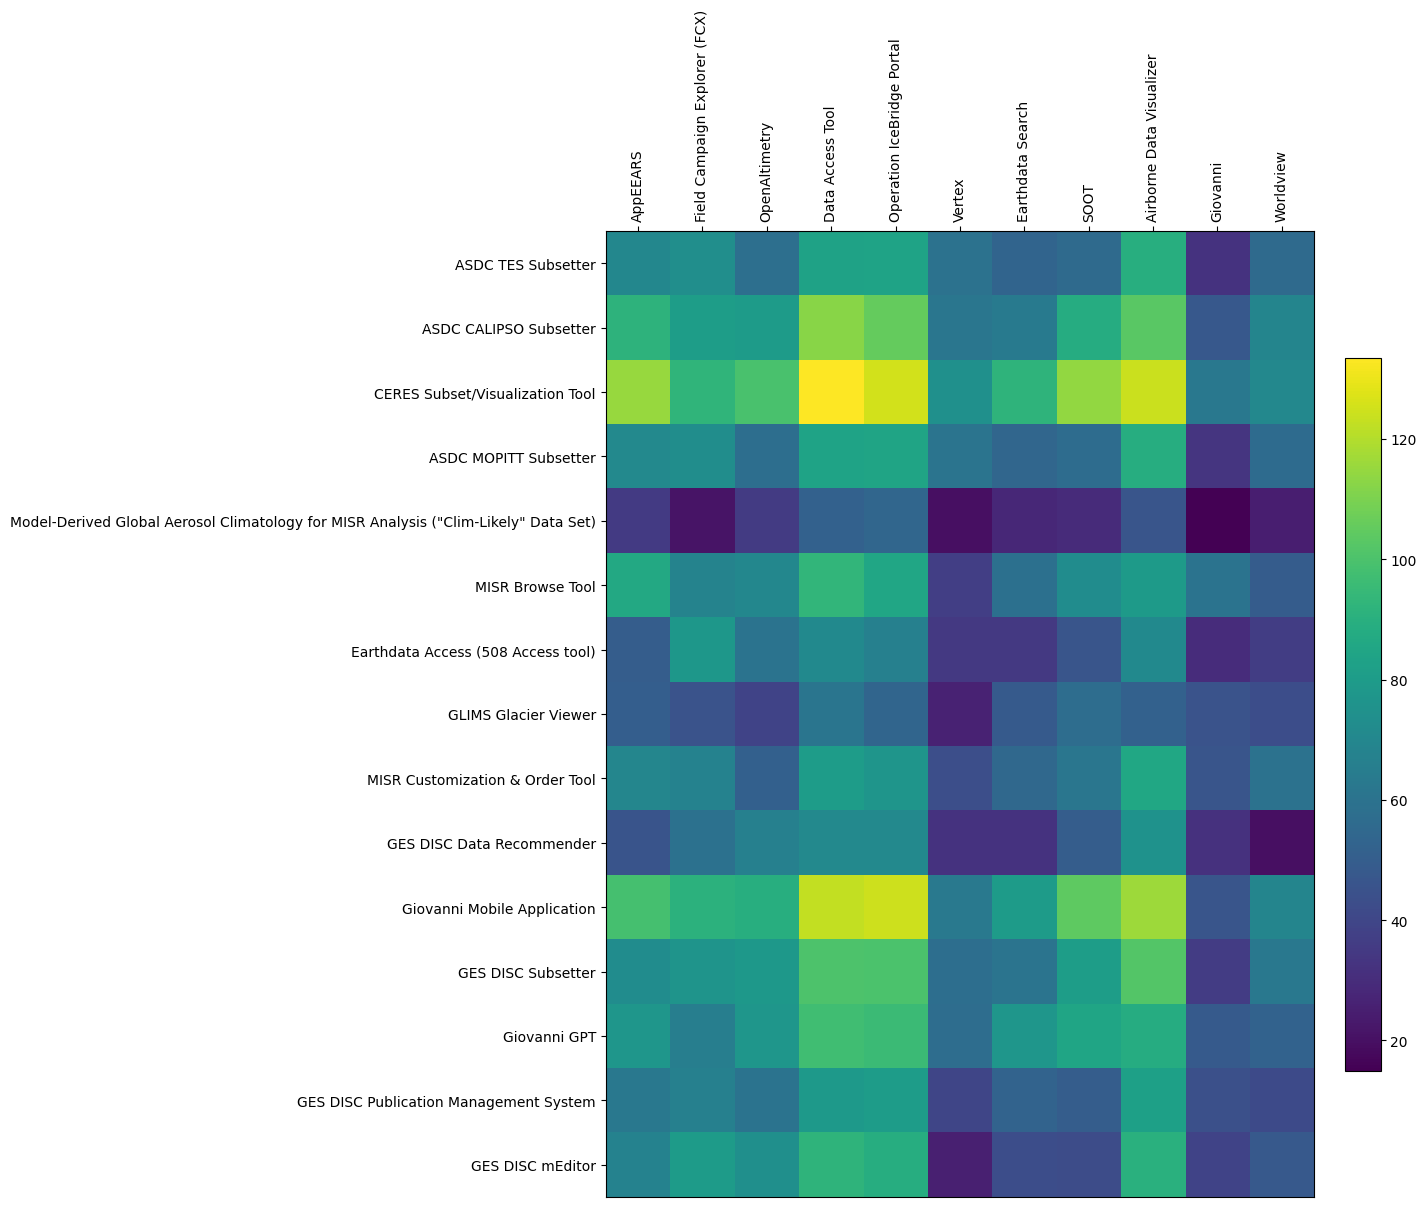

In [60]:
import matplotlib.pyplot as plt


#plt.matshow(df)
fig, ax = plt.subplots(figsize=(10,len(candidates)*7))
im = ax.imshow(df_candidates)
ax.xaxis.tick_top()
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_xticks(np.arange(len(alternatives)), labels=alternatives, rotation=90)
ax.set_yticks(np.arange(len(candidates)), labels=candidates)
plt.show()

# Candidates by Area


In [46]:
area_results =  np.zeros((len(candidates), 11, 9))

In [47]:
# Iterate over the whole thing
for i,k in enumerate(candidate_vectors.keys()):
  for j, alternative in enumerate(alternatives):
      for area_idx, a in enumerate(areas):
        if k == alternative:
          score = 0
          score_naive = 0
        else:
          # ok, normally euclidean distance is the same regardless of ordering, but in the case
          # where a tool has more functionality than another tool, then we want the scores to be
          # different. So we take the tool we're examining and remove all '0's, or capabilities
          # it doesn't have, remove those from the comparison tool, and then calculate 'distance'.
          # In the case of higher overlaps, we get a smaller number. When we compute the inverse
          # relationship- the tool with many capabilities and the comparison tool without them,
          # there will be A) more comparisons and B) a larger resulting number, signifying that
          # it's harder to converge one way vs the other.
    
          idxlist = np.nonzero(candidate_vectors[k][a['start']:a['end']])[0]
          temp_vector = [candidate_vectors[k][a['start']:a['end']][idx] for idx in idxlist]
          temp_alternative = [vectors[alternative][a['start']:a['end']][idx] for idx in idxlist]
          score = euclidean_distance(temp_vector,temp_alternative)
        area_results[i][j][area_idx] = score

          



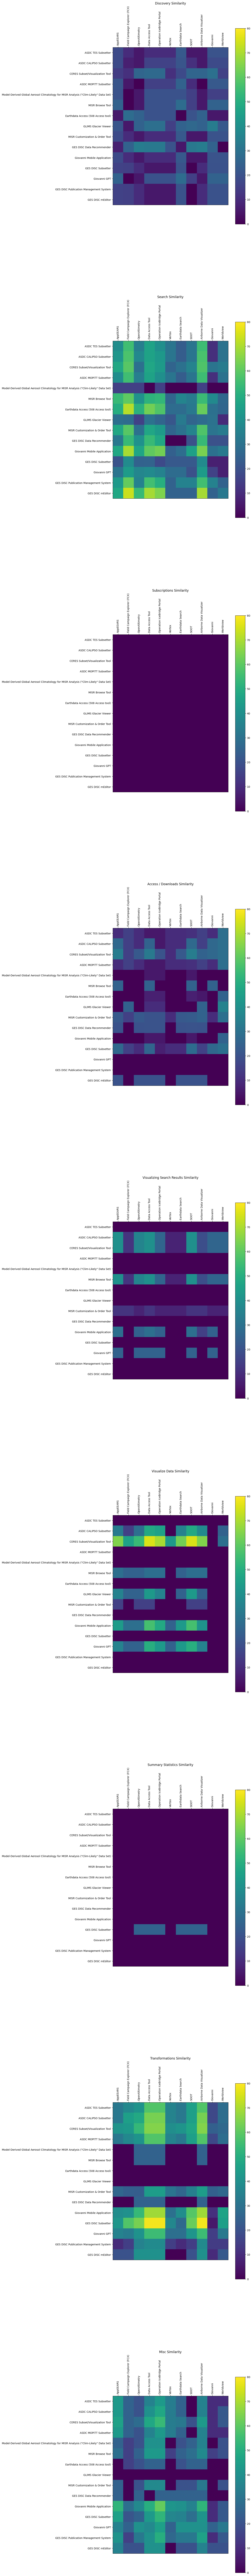

In [61]:
import matplotlib.pyplot as plt
# Here we create plots for similarity aross the fitness _area_
fig = plt.figure(figsize=(10,300))

for i, area in enumerate(areas):
    df = pd.DataFrame(area_results[:,:,i], candidates, alternatives)
    ax = fig.add_subplot(len(candidates),1,i+1)
    plt.subplots_adjust(hspace=.5)
    im = ax.imshow(df, vmin=0, vmax=80)
    ax.xaxis.tick_top()
    # ax.imshow(data, vmin=0, vmax=1, cmap='viridis')
    ax.title.set_text("" + area['name']+ ' Similarity')
    plt.colorbar(im, ax=ax)
    ax.set_xticks(np.arange(len(alternatives)), labels=alternatives, rotation=90)
    ax.set_yticks(np.arange(len(candidates)), labels=candidates)




In [49]:

tool_value_map = {}
for j in range(0, area_results[:,:,i].shape[0]):
    toolValues = []
    for i, area in enumerate(areas):   
        row = np.array(area_results[j,:,i])
        candidates_for_area = np.where(row == row.min())[0].tolist()
        #print("Tool {} - {} - Best Alternative(s): {} ".format(candidates[j], area['name'], [alternatives[q] for q in candidates_for_area]))
        if len(candidates_for_area) >= 10:
            toolValues.append(['all'])    
        else:
            toolValues.append([alternatives[q] for q in candidates_for_area])
    tool_value_map[candidates[j]] = toolValues


# Best matching alternative for each functional area

In [50]:
pd.DataFrame(tool_value_map, [x['name'] for x in areas] ).transpose()    

,Discovery,Search,Subscriptions,Access / Downloads,Visualizing Search Results,Visualize Data,Summary Statistics,Transformations,Misc
ASDC TES Subsetter,"[OpenAltimetry, SOOT, Airborne Data Visualizer]",[Giovanni],[all],"[Data Access Tool, Operation IceBridge Portal]",[all],[all],[all],[Giovanni],[SOOT]
ASDC CALIPSO Subsetter,"[OpenAltimetry, Airborne Data Visualizer]",[Giovanni],[all],[Operation IceBridge Portal],"[Vertex, Earthdata Search]","[Vertex, Giovanni]",[all],[Giovanni],[SOOT]
CERES Subset/Visualization Tool,"[Field Campaign Explorer (FCX), Vertex]",[Vertex],[all],[Vertex],"[Vertex, Earthdata Search]",[Giovanni],[all],[Giovanni],[Giovanni]
ASDC MOPITT Subsetter,"[OpenAltimetry, Airborne Data Visualizer]",[Giovanni],[all],"[Data Access Tool, Operation IceBridge Portal]",[all],[all],[all],[Giovanni],[SOOT]
"Model-Derived Global Aerosol Climatology for MISR Analysis (""Clim-Likely"" Data Set)",[Field Campaign Explorer (FCX)],"[Data Access Tool, Vertex, Earthdata Search, S...",[all],"[AppEEARS, Field Campaign Explorer (FCX), Open...",[all],[all],[all],"[AppEEARS, Field Campaign Explorer (FCX), Vert...","[Vertex, Giovanni]"
MISR Browse Tool,[Field Campaign Explorer (FCX)],[Vertex],[all],"[Field Campaign Explorer (FCX), OpenAltimetry,...","[Vertex, Earthdata Search]","[Vertex, Giovanni, Worldview]",[all],"[AppEEARS, Field Campaign Explorer (FCX), Vert...","[Field Campaign Explorer (FCX), Vertex, Giovanni]"
Earthdata Access (508 Access tool),[Earthdata Search],[Worldview],[all],"[AppEEARS, Field Campaign Explorer (FCX), Open...",[all],[all],[all],[all],"[AppEEARS, Vertex, Giovanni, Worldview]"
GLIMS Glacier Viewer,[Field Campaign Explorer (FCX)],[Worldview],[all],"[AppEEARS, OpenAltimetry, Vertex, Earthdata Se...",[all],"[Vertex, Giovanni, Worldview]",[all],[all],[all]
MISR Customization & Order Tool,"[OpenAltimetry, SOOT, Airborne Data Visualizer]",[Vertex],[all],"[Vertex, Giovanni]","[OpenAltimetry, Operation IceBridge Portal, Ve...","[Field Campaign Explorer (FCX), Operation IceB...",[all],[OpenAltimetry],"[Field Campaign Explorer (FCX), Vertex, Giovanni]"
GES DISC Data Recommender,[Worldview],"[Vertex, Earthdata Search]",[all],"[Field Campaign Explorer (FCX), Vertex, Giovan...",[all],[all],[all],"[AppEEARS, Field Campaign Explorer (FCX), Vert...","[Field Campaign Explorer (FCX), Data Access To..."
